# Datasets & DataLoaders

---

https://docs.pytorch.org/tutorials/beginner/basics/data_tutorial.html

- `Dataset` stores the samples and their corresponding labels
- `DataLoader` wraps an _iterable_ around the `Dataset` to enable easy access to the samples.

## 1. Loading a Dataset


We load the FashionMNIST Dataset with the following parameters:

- `root` is the path where the train/test data is stored,

- `train` specifies training or test dataset,

- `download=True` downloads the data from the internet if it’s not available at `root`.

- `transform` and `target_transform` specify the feature and label transformations



In [51]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import numpy as np

In [2]:
training_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)

## 2. Iterating and Visualizing the Dataset

We can index `Datasets` manually like a list:` training_data[index]`. We use `matplotlib` to visualize some samples in our training data

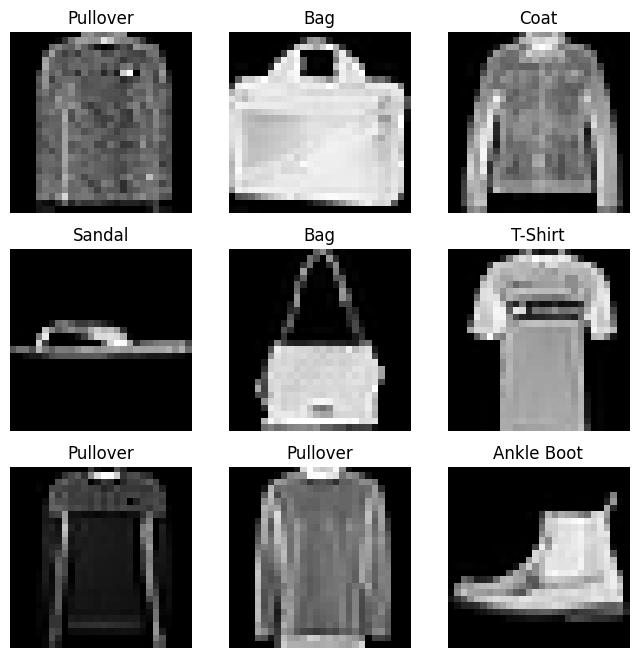

In [16]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8,8))
cols, rows = 3, 3
for i in range(1, cols*rows+1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## 3. Creating a Custom Dataset for your files

A custom Dataset class must implement three functions: `__init__`, `__len__`, and `__getitem_`_.

In [17]:
import os
import pandas as pd
from torchvision.io import decode_image

In [19]:
class CustomDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        Image = decode_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)

        return image, label

## 4. Preparing your data for training with DataLoaders

In [20]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

## 5. Iterate through the DataLoader

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


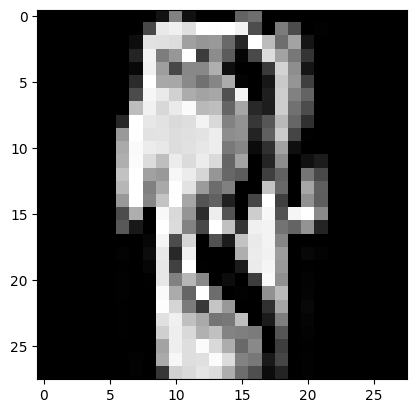

Label: 3


In [21]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

## 5. Practice with a CSV Dataset

In [27]:
data_url ='data/FinancialInclusion/Train.csv'

In [52]:
class FinancialInclusionDataset(Dataset):
    def __init__(self, data_url, target_col, transform=None, target_transform=None):
        self.data = pd.read_csv(data_url)
        self.transform=transform
        self.target_transform = target_transform
        self.X = self.data.drop(target_col, axis=1).copy()
        self.y = self.data[target_col] 
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        features, label = self.X.iloc[index,:].values, np.array(str(self.y.iloc[index]))
        if self.target_transform:
            label = self.target_transform(label)
        if self.transform:
            features = self.transform(features)
        return features, label
        

In [53]:
dataset = FinancialInclusionDataset(data_url, target_col="bank_account")
features, label = dataset[0]
print(features)  # e.g., torch.Size([num_features])
print(label)


['Kenya' np.int64(2018) 'uniqueid_1' 'Rural' 'Yes' np.int64(3)
 np.int64(24) 'Female' 'Spouse' 'Married/Living together'
 'Secondary education' 'Self employed']
Yes


In [54]:
dataloader = DataLoader(dataset=dataset, batch_size=64, shuffle=True)

In [56]:
# X, y = next(iter(dataloader))

# print(X.shape, y)

## 6. Example workflow

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. Load full dataset
df = pd.read_csv("path/to/file.csv")

# 2. Split into training and test
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# 3. Create datasets
# NOTE: Modify your Custom Datset class to accept dataframe objects, not CSV urls
train_dataset = FinancialInclusionDataset(train_df, target_col="target")
test_dataset = FinancialInclusionDataset(test_df, target_col="target")

# 4. then initialize your training and test dataloaders
...


---

# Transforms

https://docs.pytorch.org/tutorials/beginner/basics/transforms_tutorial.html

In [57]:
import torch 

from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y)))
)

In [58]:
import numpy as np

my_ndarray = np.array([[1,3],[2,4]])
my_ndarray, ToTensor(my_ndarray)

TypeError: ToTensor.__init__() takes 1 positional argument but 2 were given